# ZTA QBR - TEST CS
Fernando Pochintesta 2/19/2024

In [ ]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#UPLOAD THE FILE
df = pd.read_excel('TEST_CS.xls')

# Exploratory Analysis

In [ ]:
#View columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Invoice              39474 non-null  object        
 1   Date                 39474 non-null  datetime64[ns]
 2   Amount               39474 non-null  float64       
 3   Payment Method       39474 non-null  object        
 4   Payment Method Name  39474 non-null  object        
 5   Payment Method Type  39474 non-null  object        
 6   Email                39474 non-null  object        
 7   Card BIN             39474 non-null  int64         
 8   Card Issuer Name     39474 non-null  object        
 9   Card Issuer Country  39474 non-null  object        
 10  Card Type            39474 non-null  object        
 11  Installments         39474 non-null  int64         
 12  Status               39474 non-null  object        
dtypes: datetime64[ns](1), float64(1

In [ ]:
#Display metrics of numerical variables
df.describe()

,Amount,Card BIN,Installments
count,39474.000000,39474.000000,39474.000000
mean,215.238135,464350.806607,4.765339
std,382.063921,50567.058137,4.082142
min,0.140000,125.000000,1.000000
25%,41.140000,433831.000000,1.000000
50%,77.410000,454642.000000,3.000000
75%,173.647500,476605.000000,6.000000
max,4982.210000,985412.000000,12.000000


In [ ]:
#Date
most_recent_date = df['Date'].max()
most_recent_date

Timestamp('2021-05-31 23:58:00')

In [ ]:
#View unique values in categorical variables
print(df['Payment Method'].unique())
print(df['Payment Method Name'].unique())
print(df['Payment Method Type'].unique())
print(df['Card Issuer Name'].unique())
print(df['Card Issuer Country'].unique())
print(df['Card Type'].unique())
print(df['Status'].unique())
print(df['Installments'].unique())

['VI' 'MD' 'MC' 'MS' 'VD' 'NT' 'NJ' 'AE' 'CL' 'CO' 'LD' 'CM' 'DC' 'CB'
 'JC' 'EL' 'AG' 'DI']
['Visa' 'MasterCard Debit' 'Mastercard' 'Maestro' 'Visa Debit' 'Nativa'
 'Naranja' 'American Express' 'Cabal' 'Cordial' 'Cabal Debito' 'CMR'
 'Diners Club' 'Cordobesa' 'JCB' 'Elo' 'Argencard' 'Discover']
['CREDIT_CARD' 'DEBIT_CARD']
['BANCO STEPH' 'BANCO MLML' 'BANCO SRSR' 'BANCO STOLL' 'BANCO DONCIC'
 'BANCO ROSA' 'BANCO DLCDBA' 'BANCO ALICIA' 'BANCO ARENAS' 'BANCO HHTT'
 'BANCO LILLARD' 'BANCO RILEY' 'BANCO VK' 'BANCO CAB' 'BANCO DIVAC'
 'BANCO SOLARI' 'BANCO HOLA' 'BANCO RIVERS' 'BANCO WILLIAMS' 'BANCO MARO'
 'BANCO PARKER' 'BANCO PEJA' 'BANCO JAZZ' 'BANCO NJNJ' 'BANCO GASOL'
 'BANCO AXE' 'BANCO IVER' 'BANCO COLON' 'BANCO KLAY' 'UNKNOWN BANK'
 'BANCO STOP' 'BANCO GARDEN' 'BANCO PIPPEN' 'BANCO BIAGGIO' 'BANCO JOW'
 'BANCO MALONE' 'BANCO SHAQ' 'BANCO MILLER' 'BANCO DUNCAN' 'BANCO GLP'
 'BANCO STEIN' 'BANCO KILI' 'BANCO KOBE' 'BANCO DURANT' 'BANCO AMARE'
 'BANCO COLLINS' 'BANCO STOUDAMIRE' 'BAN

In [ ]:
#See number of categorical values per column
print(df['Payment Method'].nunique())
print(df['Payment Method Name'].nunique())
print(df['Payment Method Type'].unique())
print(df['Card Issuer Name'].nunique())
print(df['Card Issuer Country'].nunique())
print(df['Card Type'].unique())
print(df['Status'].unique())
print(df['Installments'].unique())

18
18
['CREDIT_CARD' 'DEBIT_CARD']
74
57
['CREDIT' 'DEBIT']
['REJECTED' 'APPROVED']
[ 9  1 12  2  6  3]


In [ ]:
# Verify that the columns have the same information
# Payment Method Type vs Card Type
credit = df['Payment Method Type'] == 'CREDIT_CARD'
debit = df['Payment Method Type'] == 'DEBIT_CARD'

# CREDIT_CARD y CREDIT
if (df.loc[credit, 'Card Type'] == 'CREDIT').all():
    print("Credit: Columns have the same information")
else:
    print("Credit: Columns don't have the same information")

# DEBIT_CARD y DEBIT
if (df.loc[debit, 'Card Type'] == 'DEBIT').all():
    print("Debit: Columns have the same information")
else:
    print("Debit: Columns don't have the same information")

Credit: Columns have the same information
Debit: Columns have the same information


In [ ]:
# Drop not usefull columns
df = df.drop(columns=['Invoice', 'Card BIN', 'Payment Method Type','Payment Method'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39474 entries, 0 to 39473
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 39474 non-null  datetime64[ns]
 1   Amount               39474 non-null  float64       
 2   Payment Method Name  39474 non-null  object        
 3   Email                39474 non-null  object        
 4   Card Issuer Name     39474 non-null  object        
 5   Card Issuer Country  39474 non-null  object        
 6   Card Type            39474 non-null  object        
 7   Installments         39474 non-null  int64         
 8   Status               39474 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.7+ MB


# Conversion Rate

In [ ]:
#Number of rejected values
sum_rejected = (df['Status'] == 'REJECTED').sum()
sum_rejected

14048

In [ ]:
#Number of approved values
sum_approved = (df['Status'] == 'APPROVED').sum()
sum_approved

25426

In [ ]:
#Overall CR
25426*100/39474

64.41201803718904

In [ ]:
# 'APROVED' and 'REJECTED' groupby 'Payment Method Name'
results = df.groupby('Payment Method Name')['Status'].value_counts().unstack(fill_value=0)
results['Conversion Rate'] = results['APPROVED']*100 / (results['APPROVED'] + results['REJECTED'])
# Mostrar los resultados
print(results)

Status               APPROVED  REJECTED  Conversion Rate
Payment Method Name                                     
American Express         1776      1119        61.347150
Argencard                   2         1        66.666667
CMR                        47        38        55.294118
Cabal                     100        72        58.139535
Cabal Debito                6       127         4.511278
Cordial                    14        10        58.333333
Cordobesa                  81        53        60.447761
Diners Club                10         9        52.631579
Discover                    0         1         0.000000
Elo                         0         2         0.000000
JCB                         0         2         0.000000
Maestro                   163       130        55.631399
MasterCard Debit          640       316        66.945607
Mastercard               2791      1651        62.832058
Naranja                   583       753        43.637725
Nativa                    231  

In [ ]:
#Nativa transaction percentage:
(213+113)*100/39474

0.8258600597861884

In [ ]:
#Visa transaction percentage:
(17178+8600)*100/39474

65.30374423671277

In [ ]:
#Mastercard transaction percentage:
(2791+1651)*100/39474

11.252976642853524

# Payment Method Issues by month

In [ ]:
# Filter data for each month and count approved and rejected
results = df.groupby(['Payment Method Name', df['Date'].dt.month])['Status'].value_counts().unstack(fill_value=0)

# Calculate conversion ratio in percentage
results['Conversion Rate'] = (results['APPROVED'] / (results['APPROVED'] + results['REJECTED'])) * 100

# Rearrange the DataFrame
results = results.unstack().rename({3: 'March', 4: 'April', 5: 'May'}, axis=1)

# Show the results
print(results)

Status              APPROVED                 REJECTED                  \
Date                   March   April     May    March   April     May   
Payment Method Name                                                     
American Express       405.0   809.0   562.0    376.0   499.0   244.0   
Argencard                2.0     NaN     NaN      1.0     NaN     NaN   
CMR                     26.0    10.0    11.0     12.0     6.0    20.0   
Cabal                   32.0    25.0    43.0     27.0    15.0    30.0   
Cabal Debito             6.0     0.0     0.0     22.0    26.0    79.0   
Cordial                  4.0     5.0     5.0      1.0     5.0     4.0   
Cordobesa               28.0    21.0    32.0     12.0    18.0    23.0   
Diners Club              3.0     5.0     2.0      2.0     2.0     5.0   
Discover                 NaN     NaN     0.0      NaN     NaN     1.0   
Elo                      0.0     NaN     0.0      1.0     NaN     1.0   
JCB                      0.0     0.0     NaN      1

# Paid transactions by date

In [ ]:
# We keep in the date column, only the day, without time
df['Date'] = df['Date'].dt.date

In [ ]:
# Count transactions by date and by Status
transactions = df.groupby(['Date', 'Status']).size().unstack(fill_value=0)

# Add column with total transactions
transactions['Total'] = transactions.sum(axis=1)

# Sort the DataFrame by the 'Total' column from highest to lowest
transactions = transactions.sort_values(by='APPROVED', ascending=False)

# Show the results
print(transactions)

Status      APPROVED  REJECTED  Total
Date                                 
2021-05-11       893       295   1188
2021-05-12       857       297   1154
2021-05-10       735       262    997
2021-05-13       622       230    852
2021-05-28       533       128    661
...              ...       ...    ...
2021-04-24       135        55    190
2021-03-06       134        84    218
2021-04-03       133        66    199
2021-03-07       133        93    226
2021-04-17       116        95    211

[92 rows x 3 columns]


# Ticket prices

In [ ]:
# Calculate the average amount
av_amount = df['Amount '].mean()

av_amount

215.23813472158886

In [ ]:
# Calculate the average amount by APP and REJ
av_by_Status = df.groupby('Status')['Amount '].mean()

# Show the results
print(av_by_Status)

Status
APPROVED    131.334394
REJECTED    367.098650
Name: Amount , dtype: float64


In [ ]:
# Calculate the average amount by debit and credit
av_by_card_type = df.groupby('Card Type')['Amount '].mean()

# Show the results
print(av_by_card_type)

Card Type
CREDIT    219.574194
DEBIT     179.177307
Name: Amount , dtype: float64


In [ ]:
# Count how many transactions are credit and how many are debit
count_card_type = df['Card Type'].value_counts()

# Show the results
print(count_card_type)

CREDIT    35237
DEBIT      4237
Name: Card Type, dtype: int64


# Highest Average Ticket Price

In [ ]:
# Calculate the average amount APP and REJ by Payment Mehod Name
av_amount_by_payment_method = df.groupby('Payment Method Name')['Amount '].mean()

av_amount_by_payment_method = av_amount_by_payment_method.sort_values(ascending=False)

# Show the results
print(av_amount_by_payment_method)

Payment Method Name
Discover            3147.770000
Maestro              291.232594
Diners Club          284.170526
American Express     240.888193
Visa                 222.313305
Argencard            220.563333
Mastercard           210.110011
Naranja              185.199139
Cordobesa            176.624776
MasterCard Debit     175.753692
Nativa               172.424041
Visa Debit           169.867517
Cabal Debito         156.773008
Cabal                151.238314
Cordial              140.627917
Elo                  129.065000
CMR                   73.946706
JCB                   57.755000
Name: Amount , dtype: float64


In [ ]:
# Analyze Discover payments
Discover_df = df[df['Payment Method Name'] == 'Discover']
Discover_df = Discover_df[['Amount ','Card Issuer Country']]

# Show
print(Discover_df.groupby('Card Issuer Country').count())

                     Amount 
Card Issuer Country         
US                         1


# Users Issues

In [ ]:
# Create a pivot table to count the number of 'APPROVED' and 'REJECTED' per user
tabla_pivote = df.pivot_table(index='Email', columns='Status', values='Amount ', aggfunc='count', fill_value=0)

# Rename columns for clarity
tabla_pivote.columns = [f'{status}_Count' for status in tabla_pivote.columns]

# Sort by 'REJECTED_Count' from highest to lowest
tabla_pivote = tabla_pivote.sort_values(by='REJECTED_Count', ascending=False)

# Show
tabla_pivote

,APPROVED_Count,REJECTED_Count
Email,,
noieielitataifrtatandieie@ifmtatail.com,1,156
dobinns@tataloc.com,0,135
fieierrieieirtata_britatan@pohmtatail.com,11,89
hieiector@vodnik.com,1,70
hpieierieieyrtatazspuytataifoztata@ytatahoo.com.spuy,2,67
...,...,...
jimieientatabiurrun@pohmtatail.com,1,0
jimieientata.fustieier@pohmtatail.com,1,0
jimieienittataifomieieztata@ifmtatail.com,1,0


# Most Relevant Issuers

In [ ]:
# Count the total number of transactions by 'Card Issuer Name'
total_transactions = df['Card Issuer Name'].value_counts()

# Count 'APPROVED' and 'REJECTED' by 'Card Issuer Name'
count_by_issuer_status = df.groupby(['Card Issuer Name', 'Status']).size().unstack(fill_value=0)

# Concatenate the results
result = pd.concat([total_transactions, count_by_issuer_status], axis=1)

# Rename columns for clarity
result.columns = ['Total', 'APPROVED', 'REJECTED']

# Sort by 'Total' column from highest to lowest
result = result.sort_values(by='Total', ascending=False)

# Show
print(result)

              Total  APPROVED  REJECTED
BANCO ALICIA  10619      7548      3071
BANCO ROSA     6590      3410      3180
BANCO SRSR     5747      3998      1749
BANCO STEPH    1791      1037       754
BANCO ARENAS   1456       964       492
...             ...       ...       ...
BANCO PIP         1         1         0
BANCO RODAMN      1         0         1
BANCO SER         1         0         1
BANCO ILI         1         1         0
BANCO DIRK        1         1         0

[74 rows x 3 columns]


# Installments

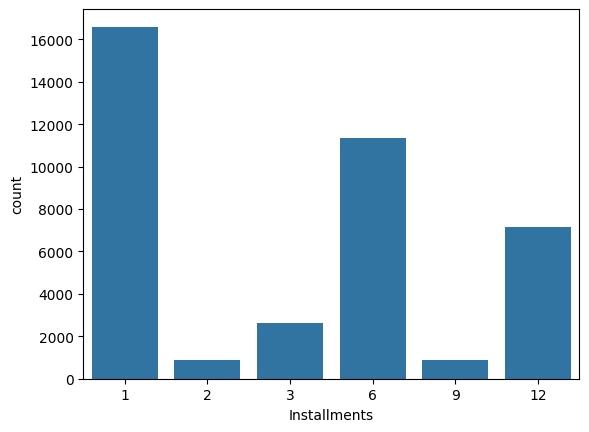

In [ ]:
# View the distribution of installments
sns.countplot(x='Installments', data=df)
plt.show()

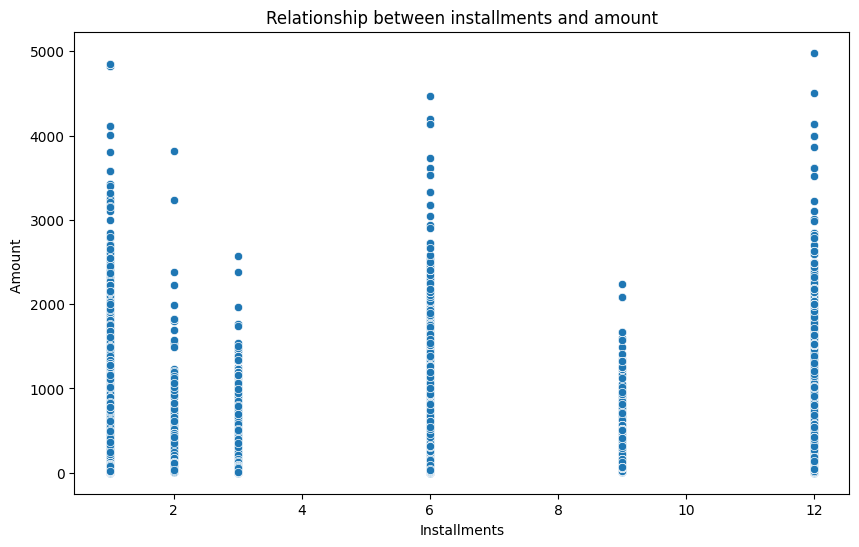

In [ ]:
# Visualize the relationship between installments and amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installments', y='Amount ', data=df)
plt.title('Relationship between installments and amount')
plt.show()

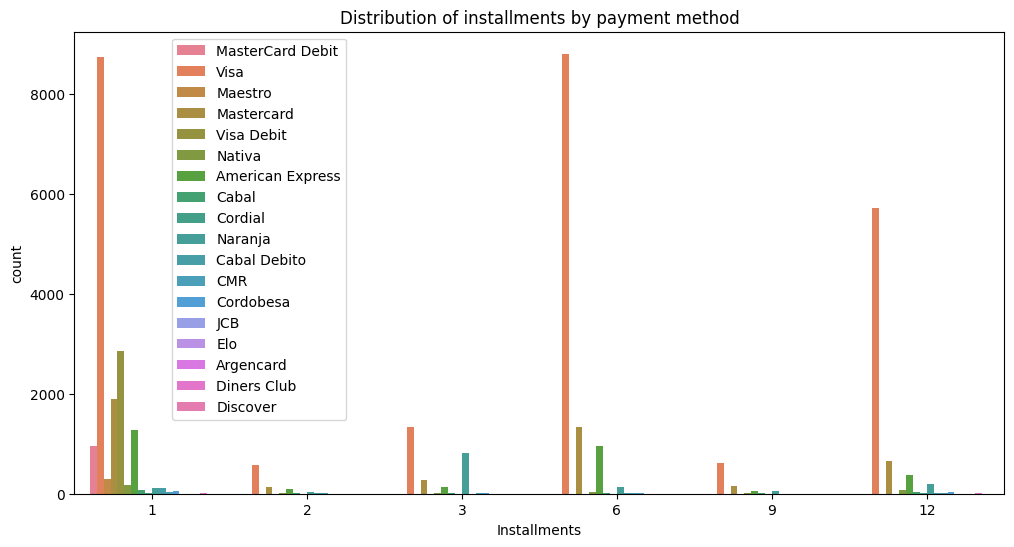

In [ ]:
# Distribution of installments by payment method
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='Installments', hue='Payment Method Name', data=df)
plt.title('Distribution of installments by payment method')
plt.legend(bbox_to_anchor=(0.3, 1))
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

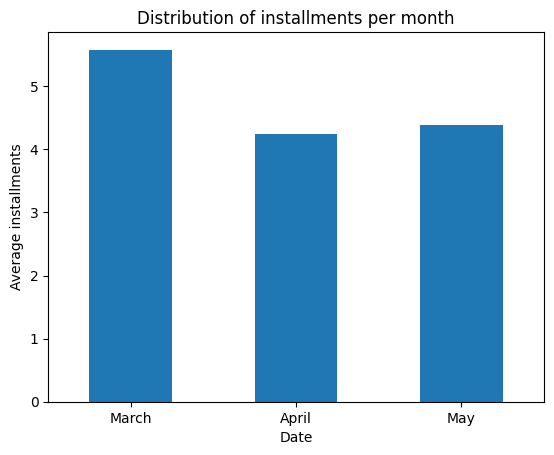

In [ ]:
# Distribution of installments per month
monthly_installments = df['Installments'].resample('M').mean()
monthly_installments.index = monthly_installments.index.strftime('%B')  # Get month names
monthly_installments.plot(kind='bar', rot=0)  # rot=0 prevents labels from tilting
plt.title('Distribution of installments per month')
plt.ylabel('Average installments')
plt.show()

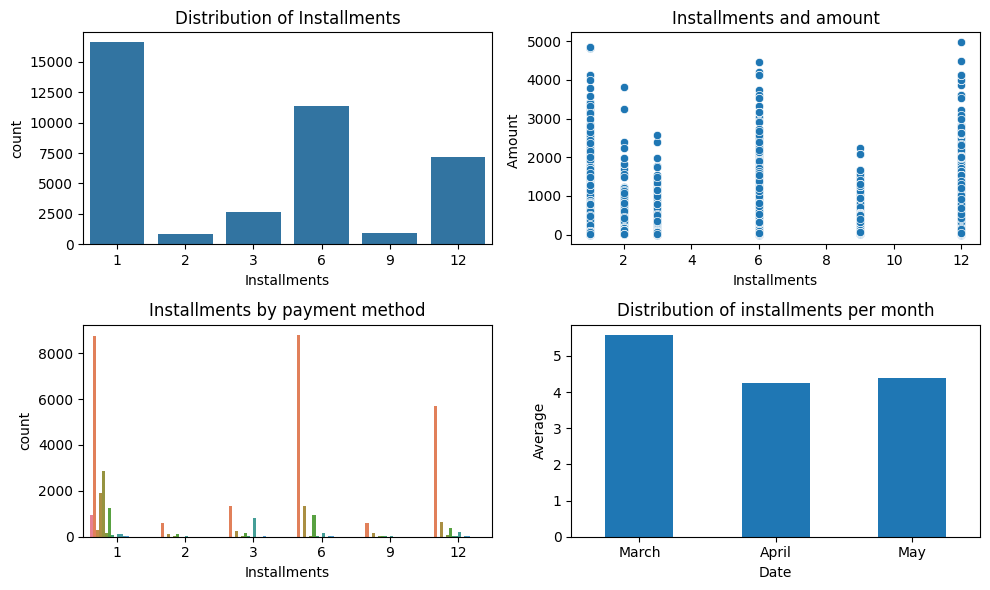

In [ ]:
# Configure subgraph layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Graph 1: Distribution of Installments
sns.countplot(x='Installments', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Installments')

# Graph 2: Relationship between installments and amount
sns.scatterplot(x='Installments', y='Amount ', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Installments and amount')

# Chart 3: Distribution of installments by payment method
sns.countplot(x='Installments', hue='Payment Method Name', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Installments by payment method')
axes[1, 0].legend().set_visible(False)

# Graph 4: Distribution of installments per month
monthly_installments = df['Installments'].resample('M').mean()
monthly_installments.index = monthly_installments.index.strftime('%B')
monthly_installments.plot(kind='bar', rot=0, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of installments per month')
axes[1, 1].set_ylabel('Average')

# Adjust the layout
plt.tight_layout()
plt.show()

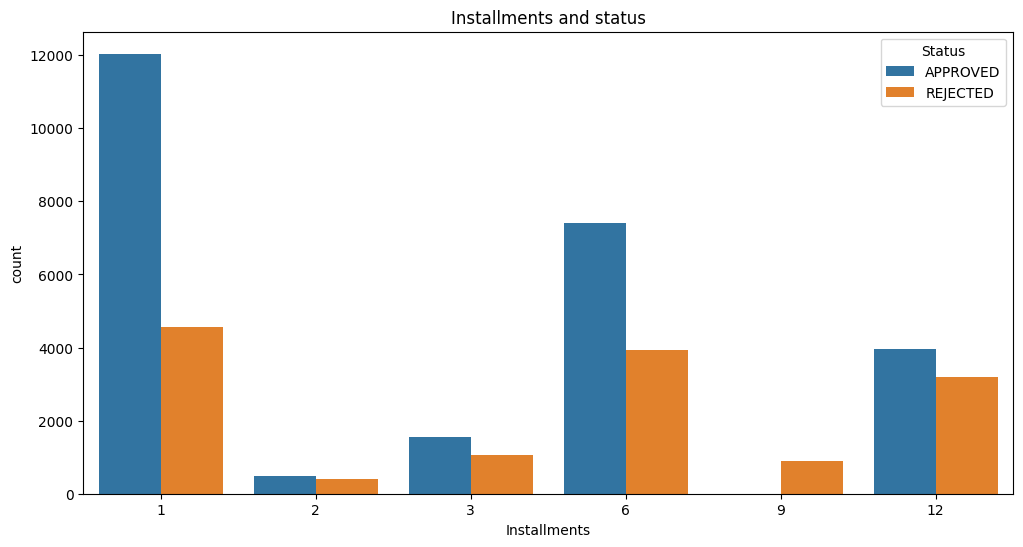

In [ ]:
# stacked bar chart for Installments and status
plt.figure(figsize=(12, 6))
sns.countplot(x='Installments', hue='Status', data=df)
plt.title('Installments and status')
plt.show()

# International Transactions

In [ ]:
# Get unique values in 'Card Issuer Name' grouped by 'Card Issuer Country'
results = df.groupby('Card Issuer Country')['Card Issuer Name'].nunique()

# Show
print(results)

Card Issuer Country
AE     1
AR    74
AT     1
AU     1
BD     1
BE     1
BG     1
BR     1
CA     1
CH     1
CL     1
CO     1
CR     1
DE     1
DK     1
EC     1
EG     1
ES     1
FR     1
GB     1
GE     1
GI     1
GT     1
ID     1
IE     1
IN     1
IT     1
JP     1
KE     1
KG     1
KR     1
LT     1
MU     1
MX     1
NG     1
NI     1
NL     1
NO     1
NZ     1
PA     1
PE     1
PH     1
PL     1
PR     1
PT     1
PY     1
SE     1
SN     1
TC     1
TN     1
TW     1
TZ     1
US     1
UY     1
VE     1
WS     1
ZA     1
Name: Card Issuer Name, dtype: int64


In [ ]:
# AR transactions
count_ar = (df['Card Issuer Country'] == 'AR').sum()
count_ar

38657

In [ ]:
# Percentage of transactions in Argentina
38657*100/39474

97.93028322440087

In [ ]:
# Calculate the number of 'APPROVED' and 'REJECTED' grouped by 'Payment Method Name'
results = df.groupby('Card Issuer Country')['Status'].value_counts().unstack(fill_value=0)
results['Conversion Rate'] = results['APPROVED']*100 / (results['APPROVED'] + results['REJECTED'])
# Show
print(results)

Status               APPROVED  REJECTED  Conversion Rate
Card Issuer Country                                     
AE                          0         1         0.000000
AR                      25171     13486        65.113692
AT                          0         1         0.000000
AU                          0         2         0.000000
BD                          0         1         0.000000
BE                          0         2         0.000000
BG                          0         1         0.000000
BR                          1        19         5.000000
CA                          0        20         0.000000
CH                          4         5        44.444444
CL                          4        11        26.666667
CO                         31        58        34.831461
CR                          0         2         0.000000
DE                          0         3         0.000000
DK                          0         2         0.000000
EC                          0  